# Data Analysis Health

***

The client has provided one year’s worth of timeline raw data for one of their facilities. The team will need you to clean it up and analyze it. The data shows the timeline for around 5,000 patient visits, and includes the following information about the visits: 

    What hour of the day the patient arrived
    How long check-in takes 
    How long the patient has to wait before they meet with a nurse to get vitals taken (blood pressure, heart rate, etc.) 
    How long it takes the nurse to complete the vitals examination 
    How long the patient has to wait between getting vitals taken and meeting with a doctor 
    How long the patient is with the doctor 
    How long it takes the patient to complete the final payment/insurance 
    Which receptionist each patient works with 
    Which diagnosis group the doctor has tagged them (Group 1 = most severe; Group 3 = least severe) 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

import sweetviz

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# import researchpy as rp

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter

import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
# from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet, Lasso, Ridge
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

# from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
# from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
# from sklearn.naive_bayes import GaussianNB, MultinomialNB

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
#import feature_engine
#from feature_engine import imputation as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Healthy.csv")

In [3]:
df.head()

,Unique ID,Year,"Arrival(Hour of day, GMT)",Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins),Diagnosisgroup,Admin(check-in),Nurse(vitals),Doctor
0,476,2019,11,1.00,12.00,3.00,13.00,8.10,2.00,Group 3,"Akapo, K","Kumar, S",Dr. Jankowski
1,902,2019,20,2.00,10.00,5.75,13.00,7.20,6.00,Group 3,"Akapo, K","Turner, P",Dr. Yung
2,1236,2019,9,3.00,24.70,4.60,23.40,6.00,2.00,Group 2,"Smith, J","Musk, J",Dr. Jankowski
3,1925,2019,11,2.00,14.00,5.75,18.00,3.60,2.00,Group 3,"Smith, J","Turner, P",Dr. Jankowski
4,1999,2019,13,3.00,16.50,4.20,22.00,7.20,6.00,Group 3,"Akapo, K","Lumantas, M",Dr. Jankowski


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5007 entries, 0 to 5006
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unique ID                  5007 non-null   int64  
 1   Year                       5007 non-null   int64  
 2   Arrival(Hour of day, GMT)  5007 non-null   int64  
 3   Check-in(mins)             5007 non-null   float64
 4   Waitforvitals(mins)        5007 non-null   float64
 5   Vitals(mins)               5007 non-null   float64
 6   Waitfordoctor(mins)        5007 non-null   float64
 7   Doctorvisit(mins)          5007 non-null   float64
 8   Payment(mins)              5007 non-null   float64
 9   Diagnosisgroup             5007 non-null   object 
 10  Admin(check-in)            5007 non-null   object 
 11  Nurse(vitals)              5007 non-null   object 
 12  Doctor                     5007 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage:

In [5]:
df.describe(include='all')

,Unique ID,Year,"Arrival(Hour of day, GMT)",Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins),Diagnosisgroup,Admin(check-in),Nurse(vitals),Doctor
count,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007.00,5007,5007,5007,5007
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,8,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Group 3,"Smith, J","Kumar, S",Dr. Jankowski
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2941,2509,883,1145
mean,503073.31,2019.00,14.50,2.79,16.39,5.12,23.30,6.45,3.58,NaN,NaN,NaN,NaN
std,290148.82,0.00,3.47,1.45,6.47,1.42,8.12,2.67,2.66,NaN,NaN,NaN,NaN
min,476.00,2019.00,9.00,1.00,2.55,2.55,6.80,3.60,1.00,NaN,NaN,NaN,NaN
25%,257003.50,2019.00,11.00,2.00,12.10,4.20,18.00,4.50,2.00,NaN,NaN,NaN,NaN
50%,504724.00,2019.00,15.00,2.00,15.40,4.75,22.00,5.40,3.00,NaN,NaN,NaN,NaN
75%,753581.00,2019.00,18.00,4.00,20.00,5.75,27.50,7.20,4.00,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Unique ID', 'Year', 'Arrival(Hour of day, GMT)', 'Check-in(mins)', 'Waitforvitals(mins)', 'Vitals(mins)', 'Waitfordoctor(mins)', 'Doctorvisit(mins)', 'Payment(mins)', 'Diagnosisgroup', 'Admin(check-in)', 'Nurse(vitals)', 'Doctor'], dtype='object')

In [7]:
df.Year.value_counts()

2019    5007
Name: Year, dtype: int64

In [8]:
df["Admin(check-in)"].value_counts()

Smith, J    2509
Akapo, K    1871
Ramos, T     627
Name: Admin(check-in), dtype: int64

In [9]:
df["Nurse(vitals)"].value_counts()

Kumar, S       883
Lumantas, M    731
Birdsall, A    640
Aros, W        625
Knight, F      580
Turner, P      552
Musk, J        532
Banu, H        464
Name: Nurse(vitals), dtype: int64

In [10]:
df["Doctor"].value_counts()

Dr. Jankowski    1145
Dr. Yung         1007
Dr. Balla        1000
Dr. Campbell      996
Dr. Campos        859
Name: Doctor, dtype: int64

### Groupby Function

In [11]:
df.groupby(["Doctor"])["Check-in(mins)",'Waitforvitals(mins)', 'Vitals(mins)', 'Waitfordoctor(mins)', 'Doctorvisit(mins)', 'Payment(mins)'].mean()

,Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins)
Doctor,,,,,,
Dr. Balla,2.84,16.51,5.15,29.64,6.79,3.61
Dr. Campbell,2.75,16.27,5.17,21.85,6.43,3.65
Dr. Campos,2.76,16.56,5.03,21.41,6.33,3.62
Dr. Jankowski,2.74,16.34,5.12,21.83,6.42,3.54
Dr. Yung,2.84,16.31,5.12,21.71,6.27,3.50


In [12]:
df.groupby(["Doctor"])["Check-in(mins)",'Waitforvitals(mins)', 'Vitals(mins)', 'Waitfordoctor(mins)', 'Doctorvisit(mins)', 'Payment(mins)'].count()

,Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins)
Doctor,,,,,,
Dr. Balla,1000,1000,1000,1000,1000,1000
Dr. Campbell,996,996,996,996,996,996
Dr. Campos,859,859,859,859,859,859
Dr. Jankowski,1145,1145,1145,1145,1145,1145
Dr. Yung,1007,1007,1007,1007,1007,1007


In [13]:
df.groupby(["Diagnosisgroup"])["Check-in(mins)",'Waitforvitals(mins)', 'Vitals(mins)', 'Waitfordoctor(mins)', 'Doctorvisit(mins)', 'Payment(mins)'].mean()

,Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins)
Diagnosisgroup,,,,,,
Group 1,2.85,16.35,5.07,22.83,11.18,3.42
Group 2,2.83,16.47,5.16,23.57,6.76,3.60
Group 3,2.75,16.35,5.12,23.26,5.33,3.61


In [14]:
df.groupby(["Nurse(vitals)"])["Check-in(mins)",'Waitforvitals(mins)', 'Vitals(mins)', 'Waitfordoctor(mins)', 'Doctorvisit(mins)', 'Payment(mins)'].mean()

,Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins)
Nurse(vitals),,,,,,
"Aros, W",2.72,16.41,4.69,23.49,6.21,3.49
"Banu, H",2.75,16.18,5.67,23.07,6.41,3.59
"Birdsall, A",2.82,16.27,4.18,23.08,6.43,3.53
"Knight, F",2.86,16.61,5.45,23.04,6.47,3.72
"Kumar, S",2.77,16.13,4.96,23.22,6.60,3.59
"Lumantas, M",2.78,16.51,5.14,23.39,6.40,3.70
"Musk, J",2.78,16.51,5.64,23.47,6.64,3.61
"Turner, P",2.82,16.59,5.66,23.61,6.37,3.40


### SweetViz Reports

In [15]:
report = sweetviz.analyze(df)
report.show_html("analysis.html")

                                             |                                             | [  0%]   00:00 ->…

Report analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



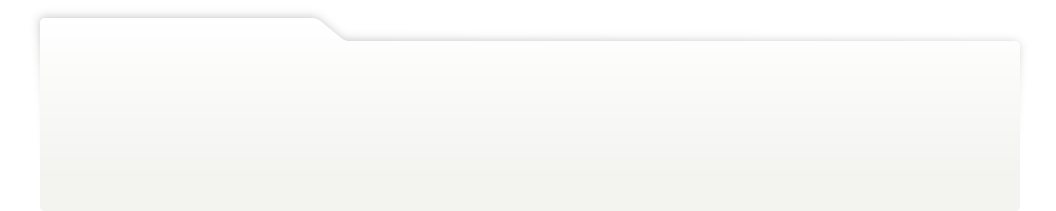
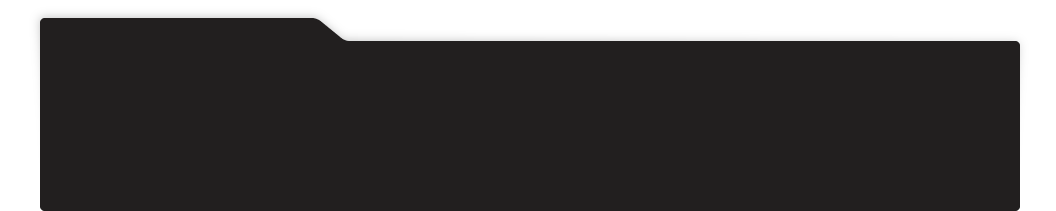
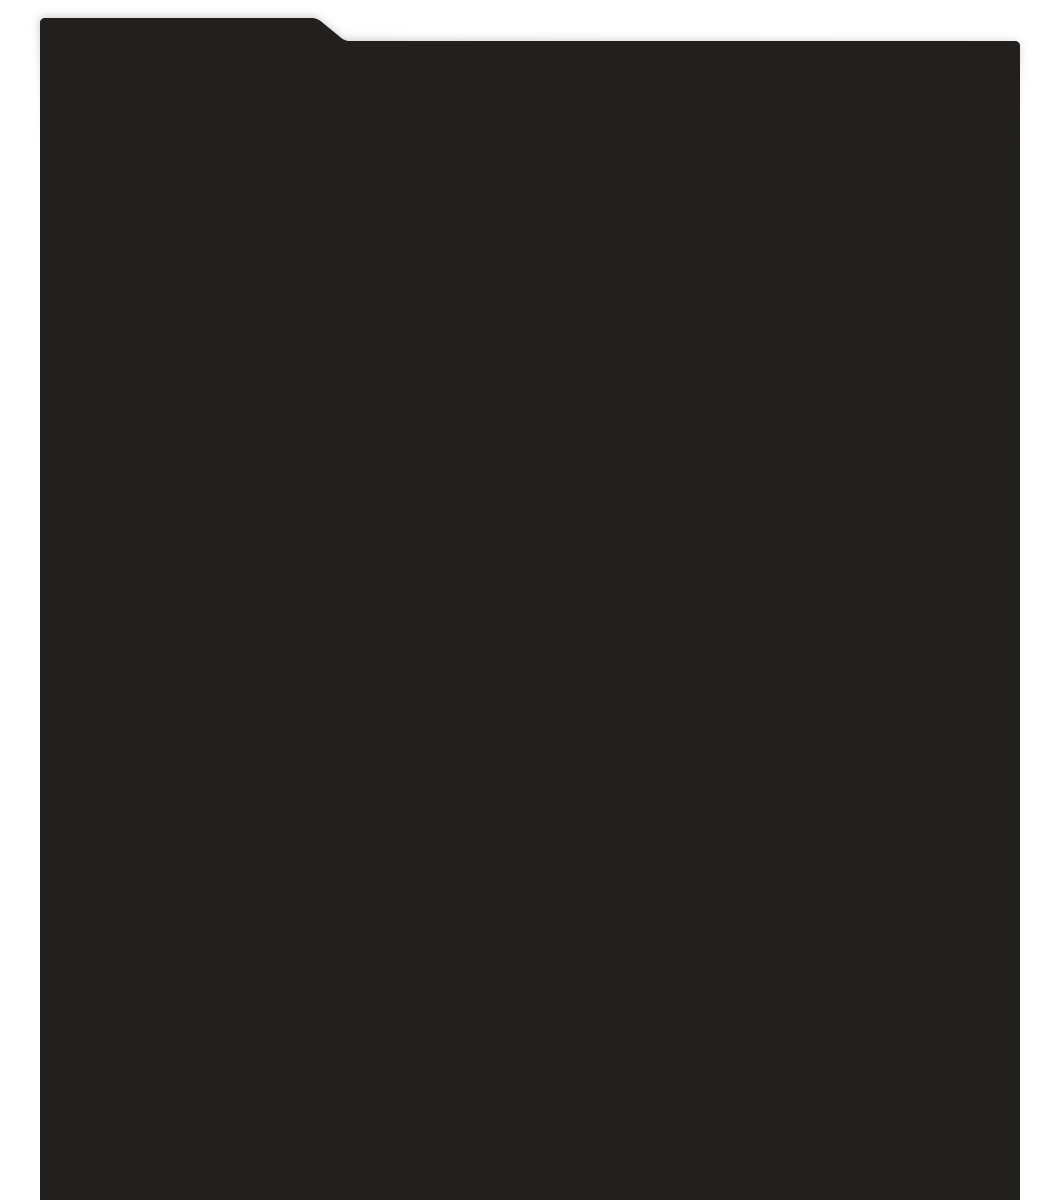
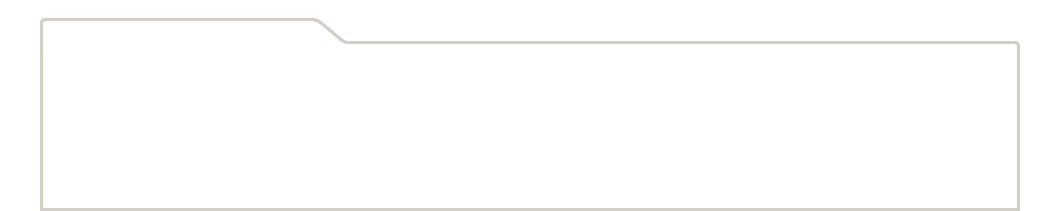
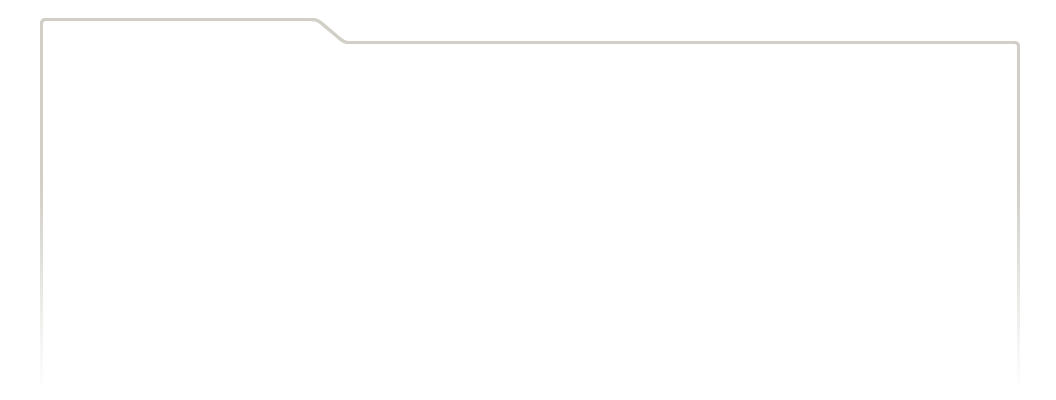
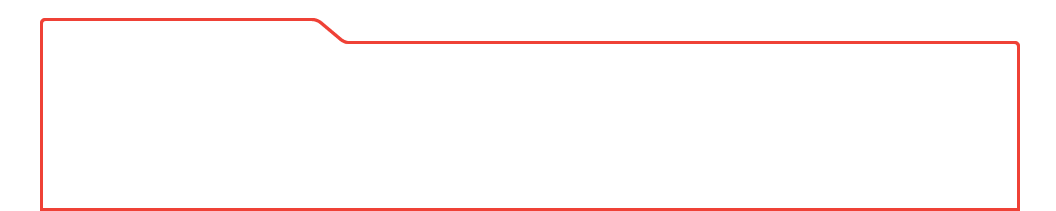
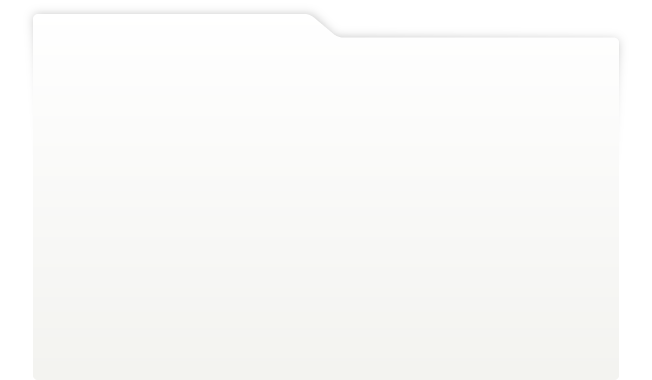
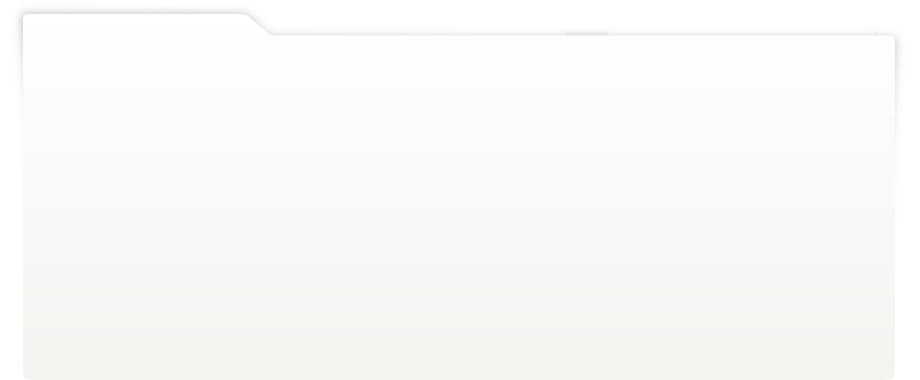
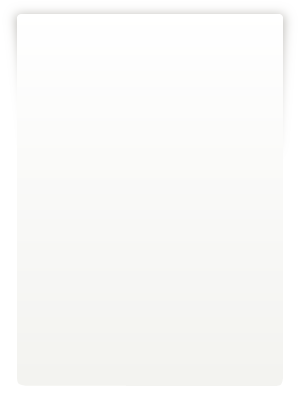
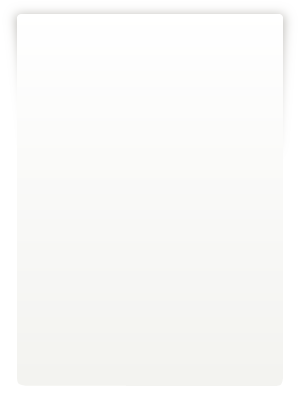
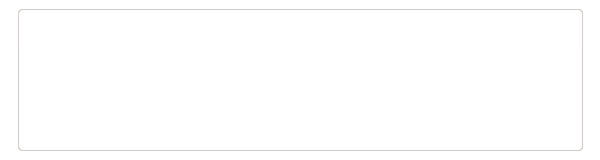
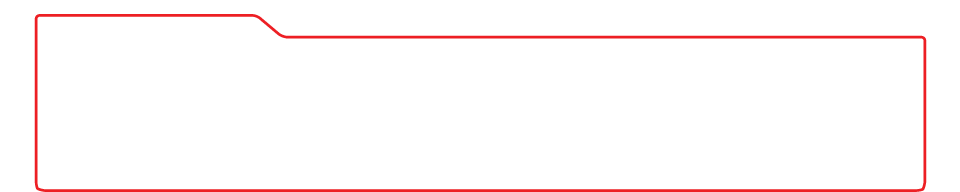
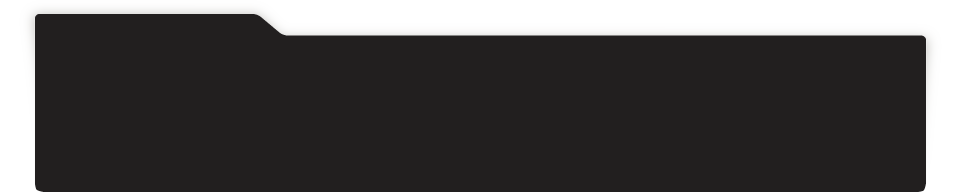
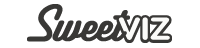
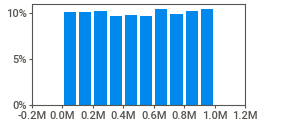
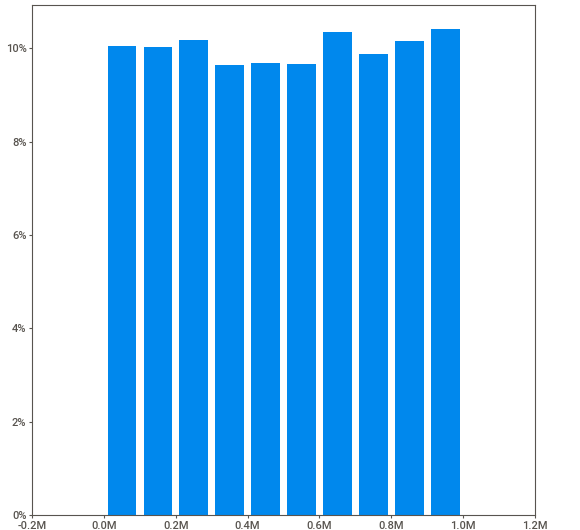
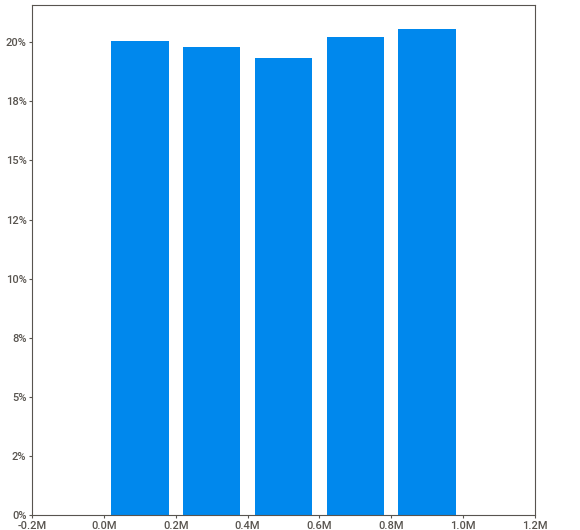
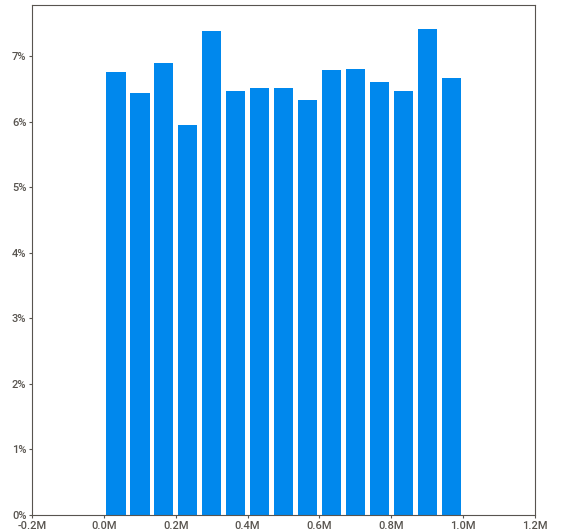
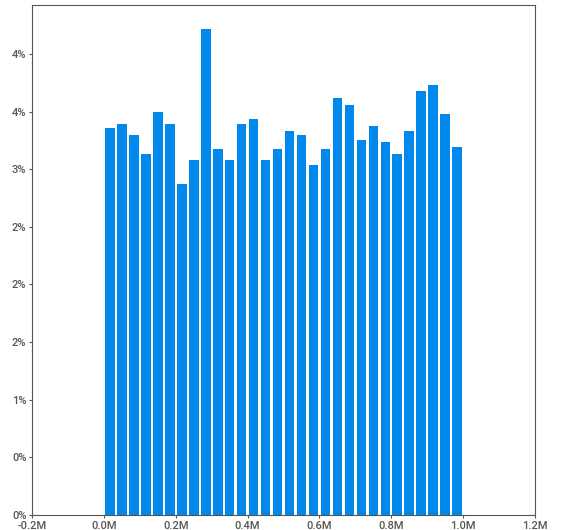
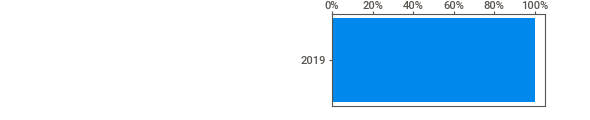
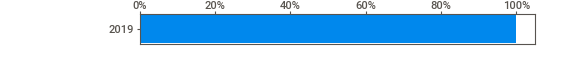
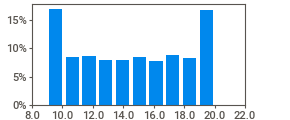
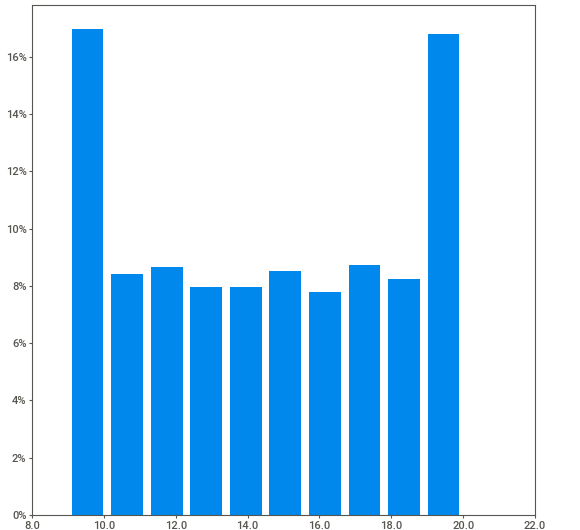
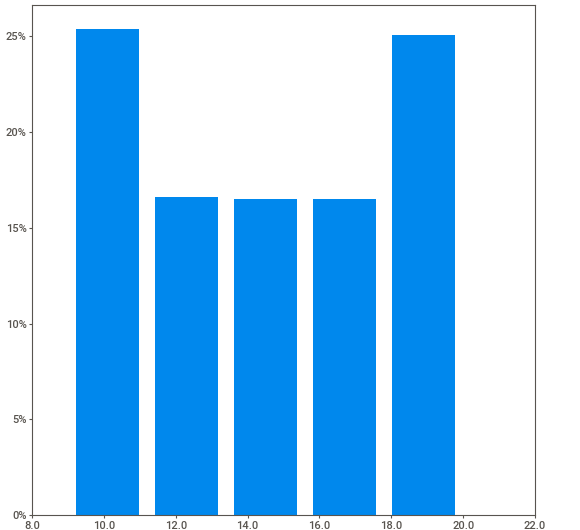
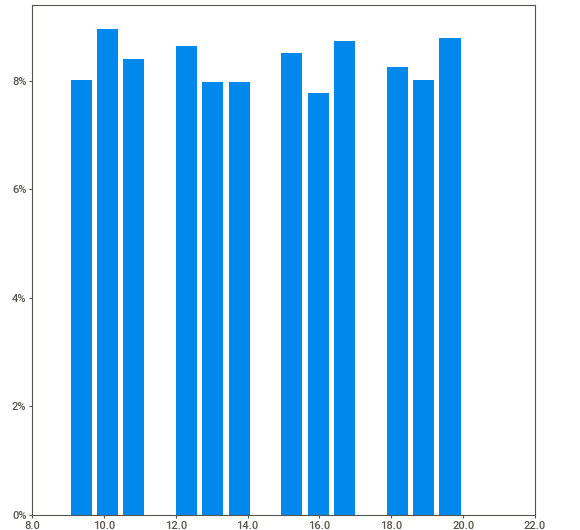
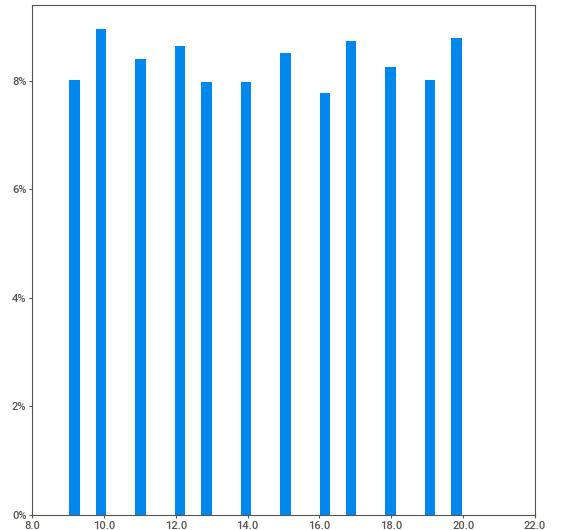
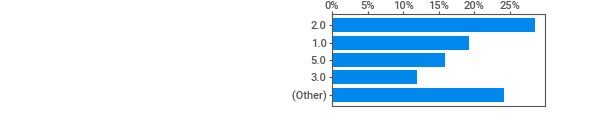
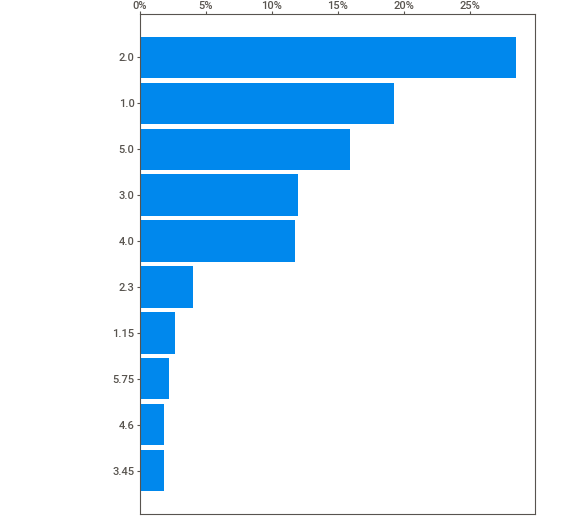
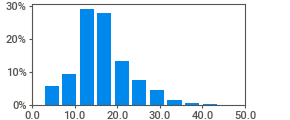
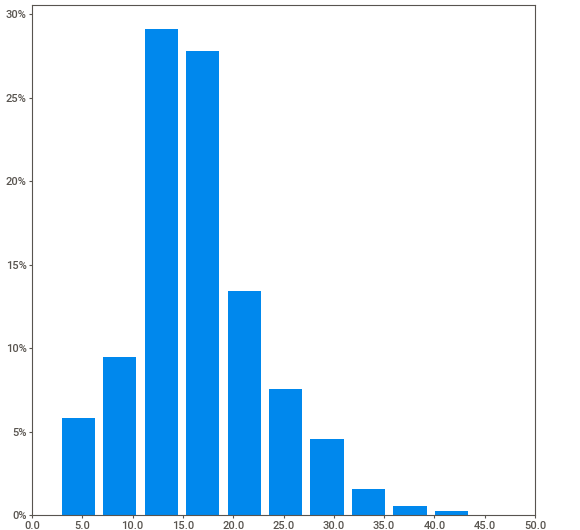
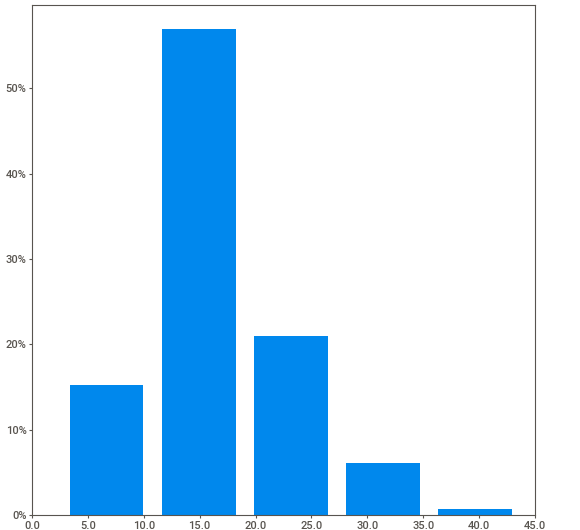
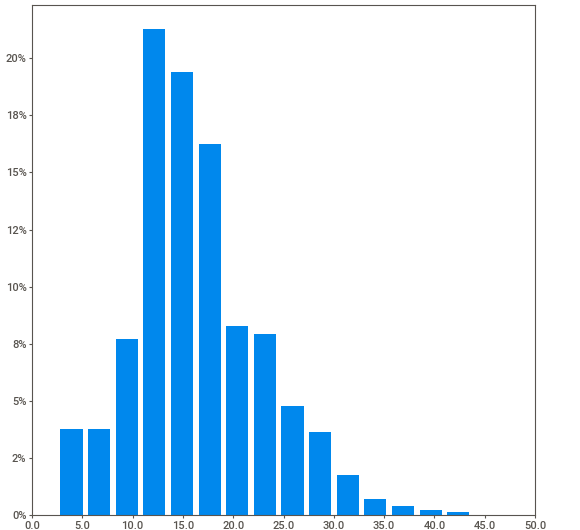
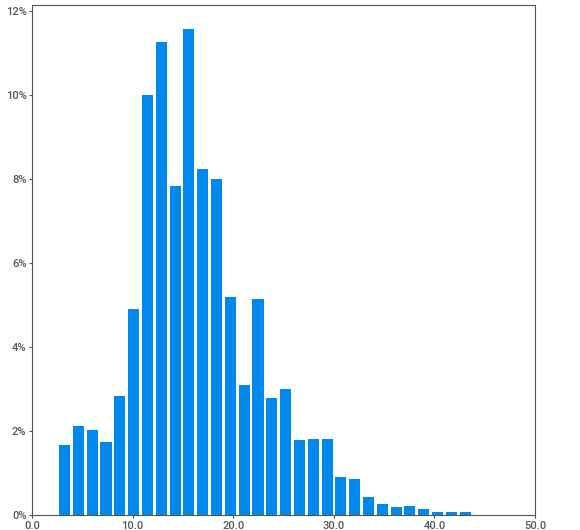
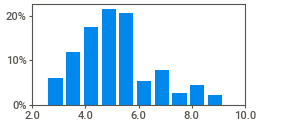
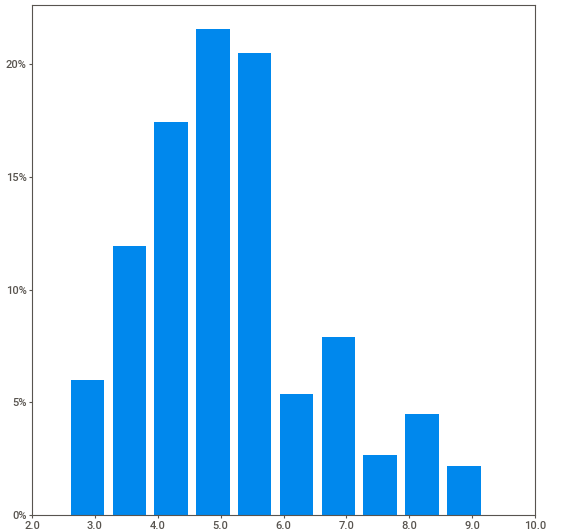
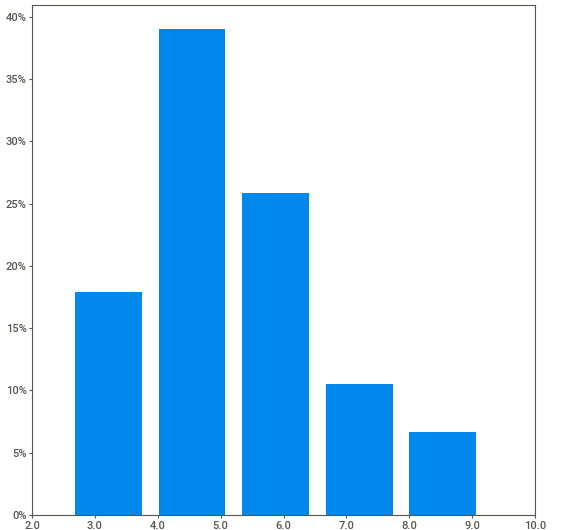
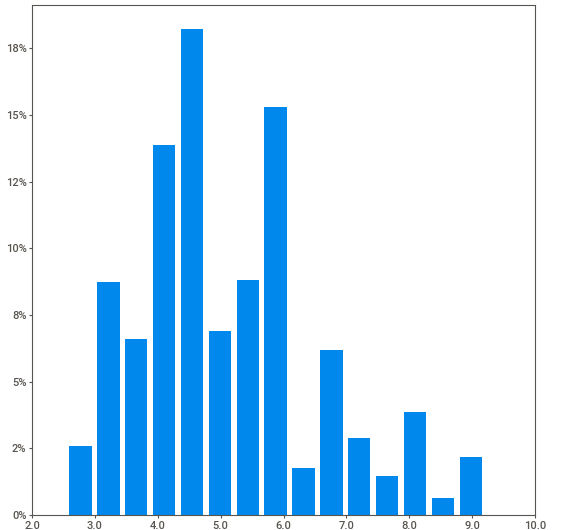
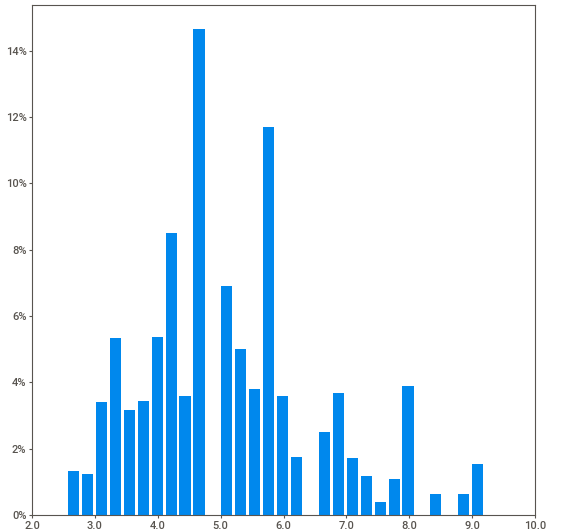
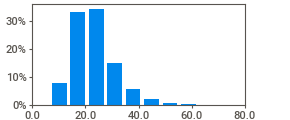
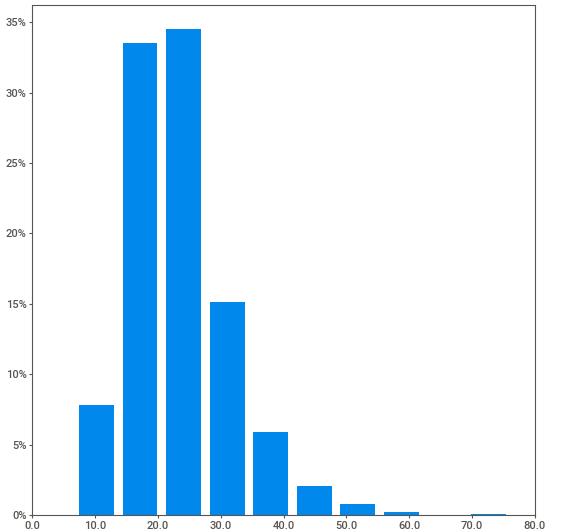
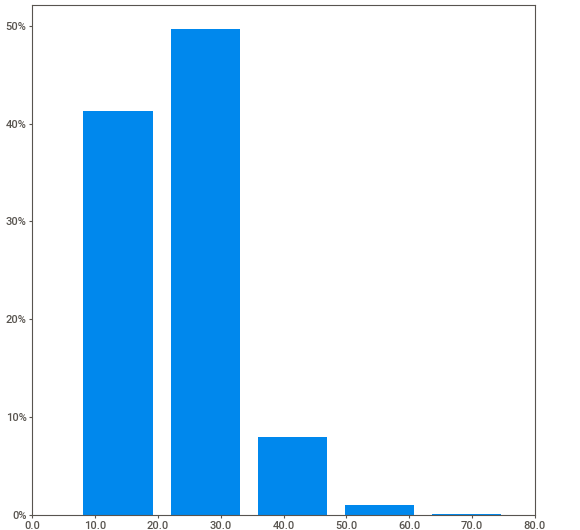
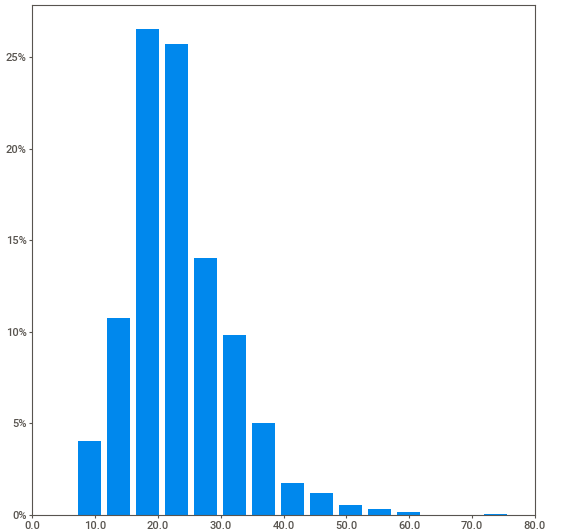
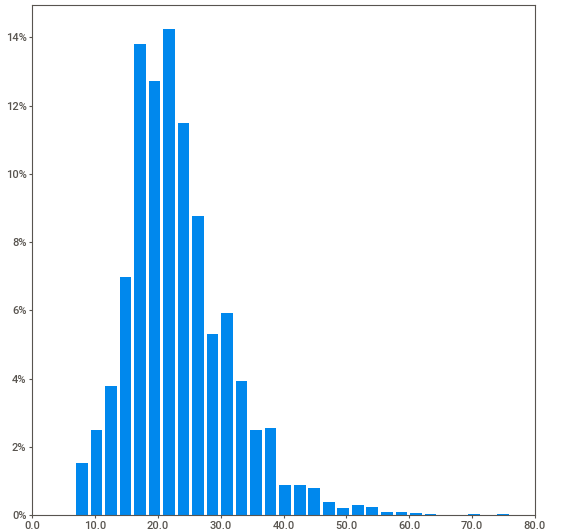
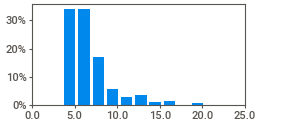
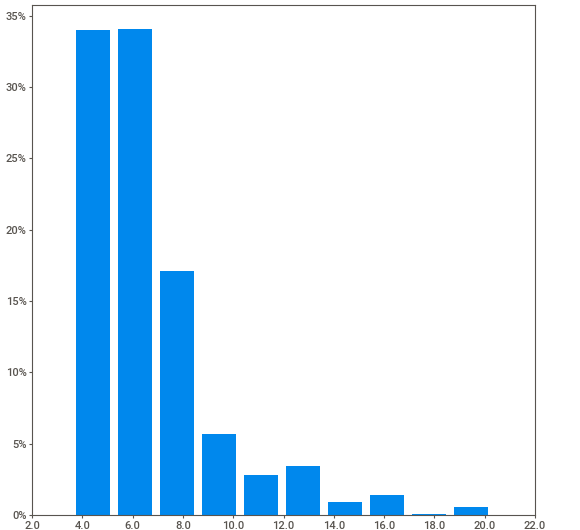
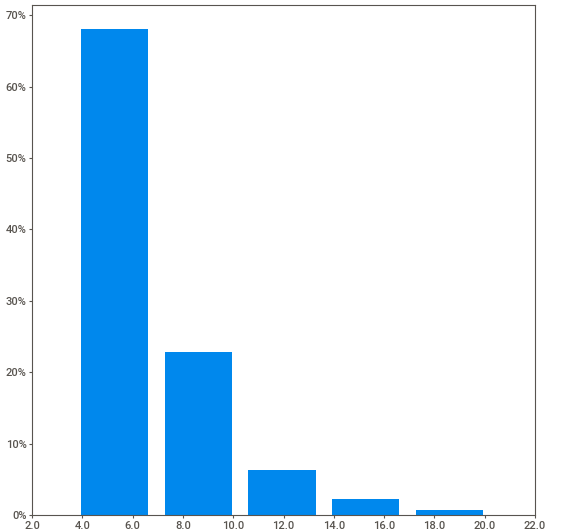
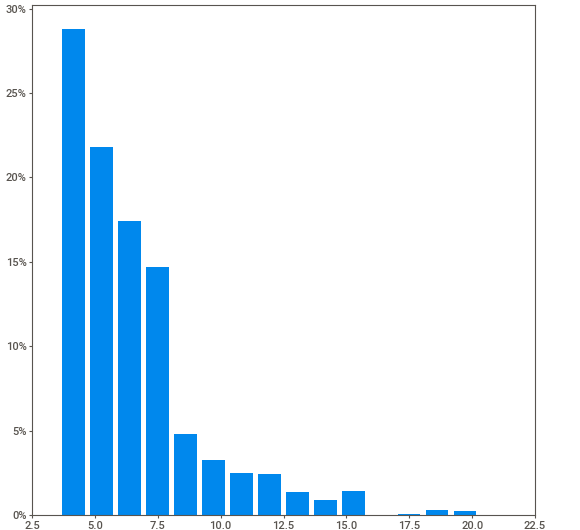
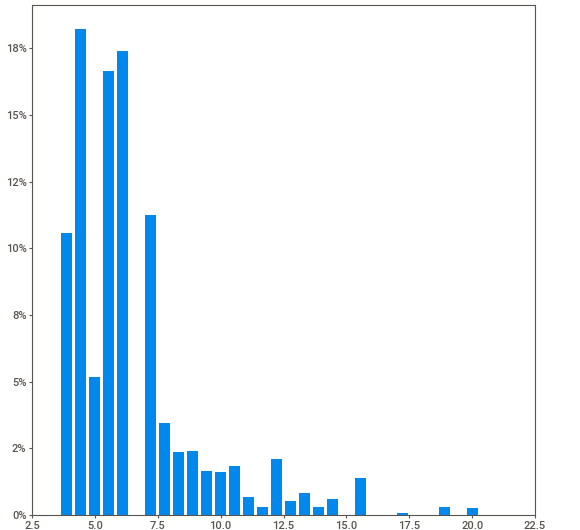
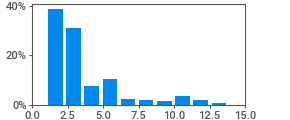
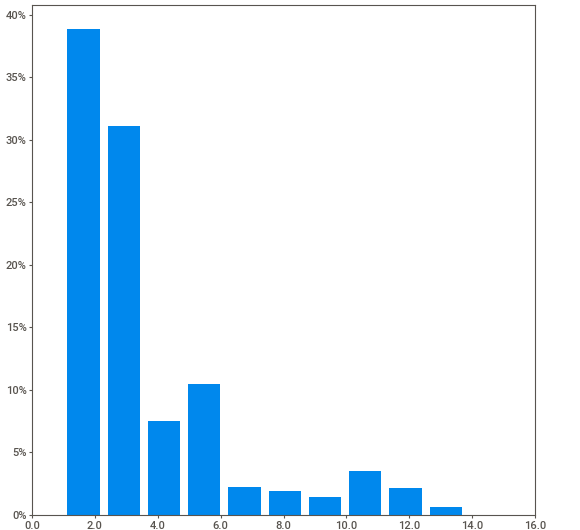
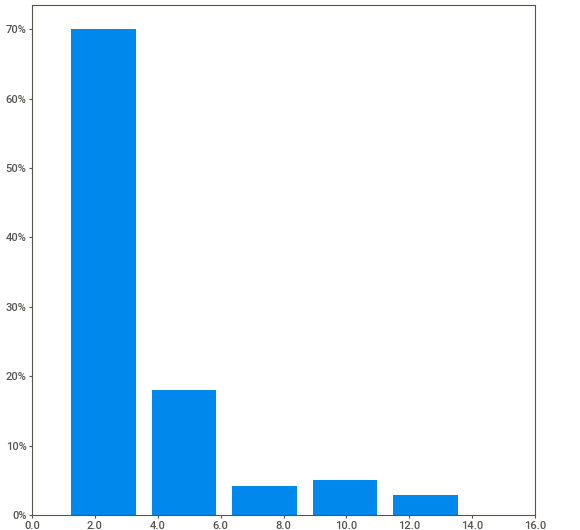
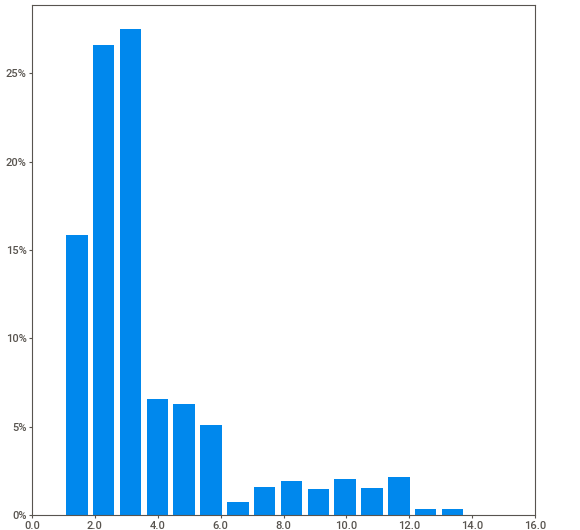
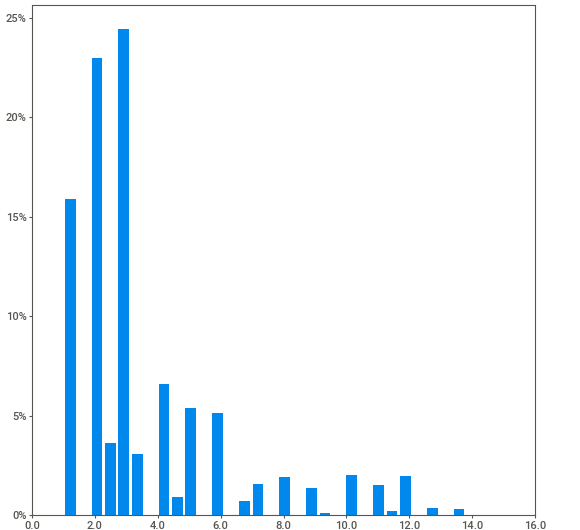
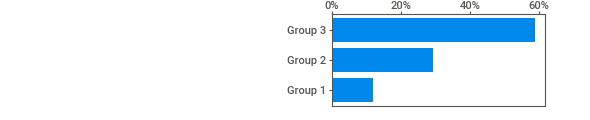
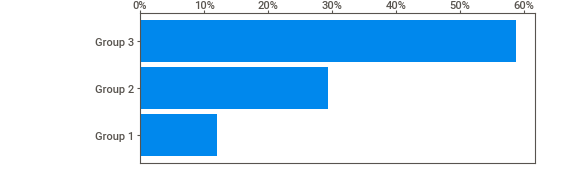
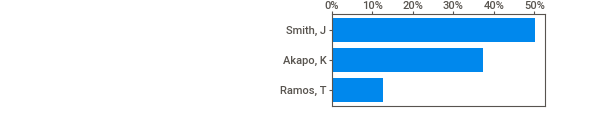
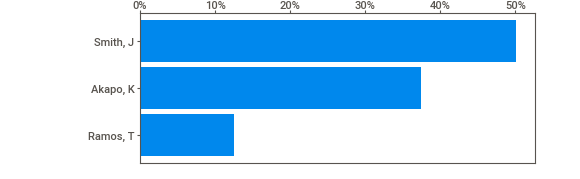
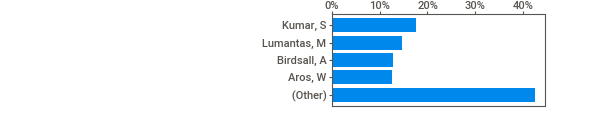
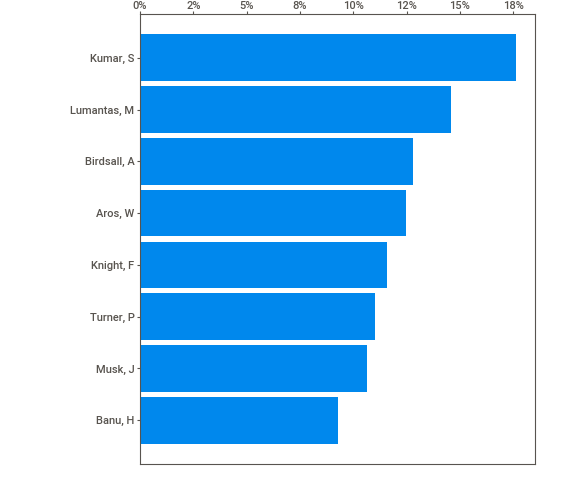
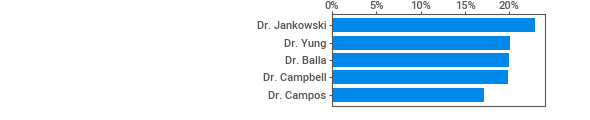
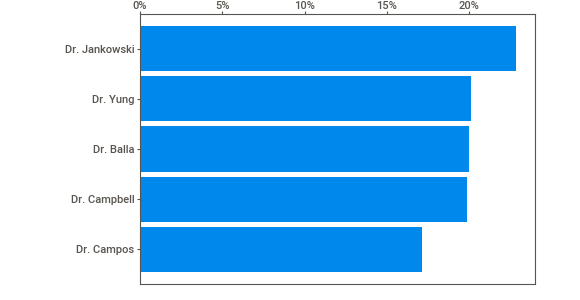
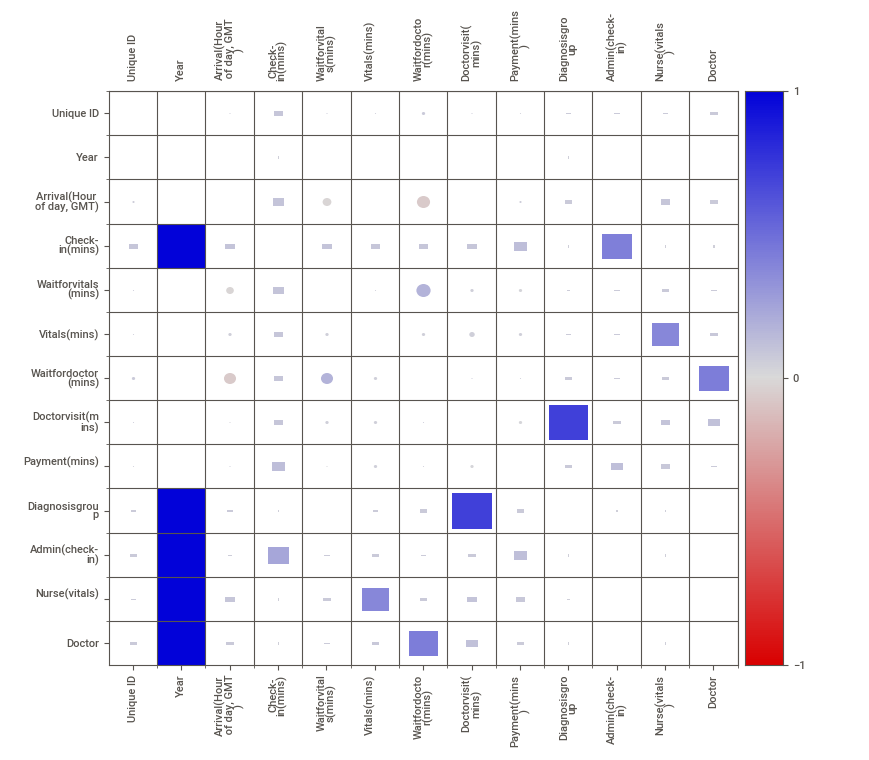
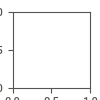

In [16]:
report.show_notebook()

## Data Visualization

### Univariate Data Exploration

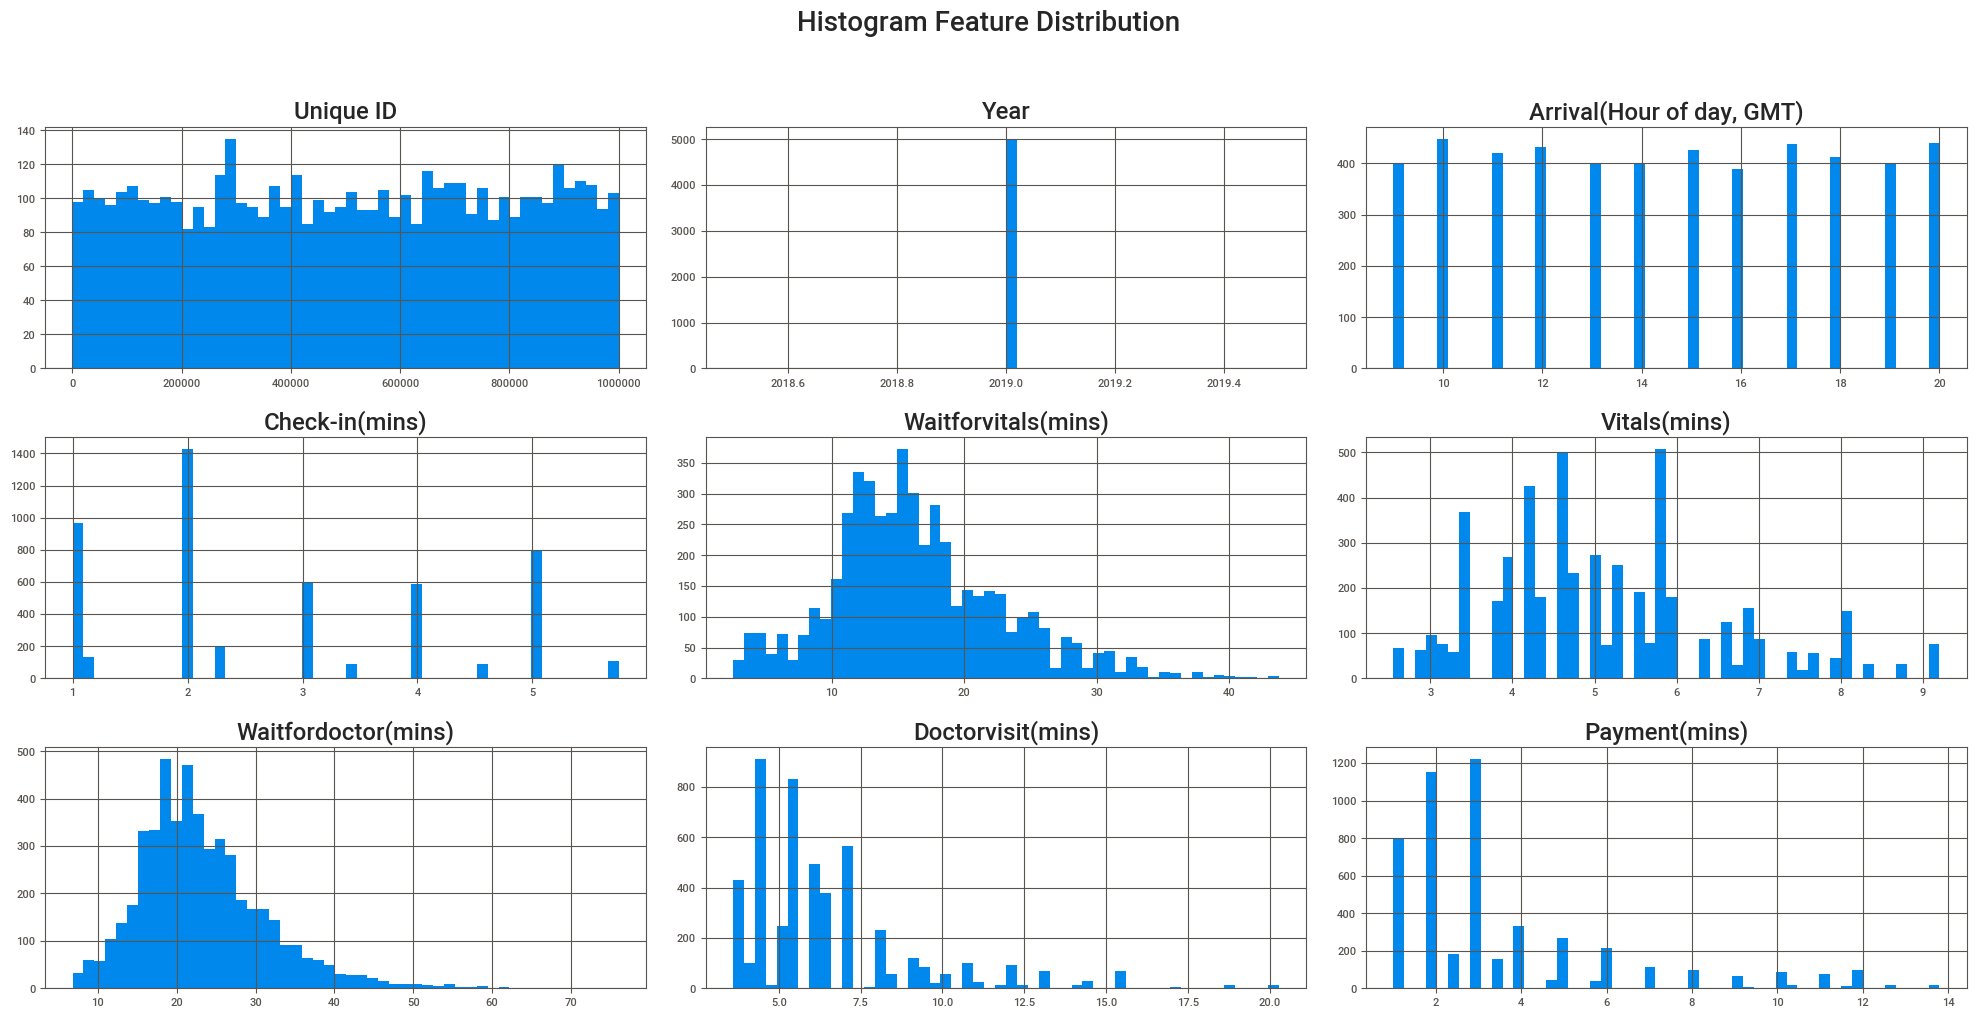

In [17]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

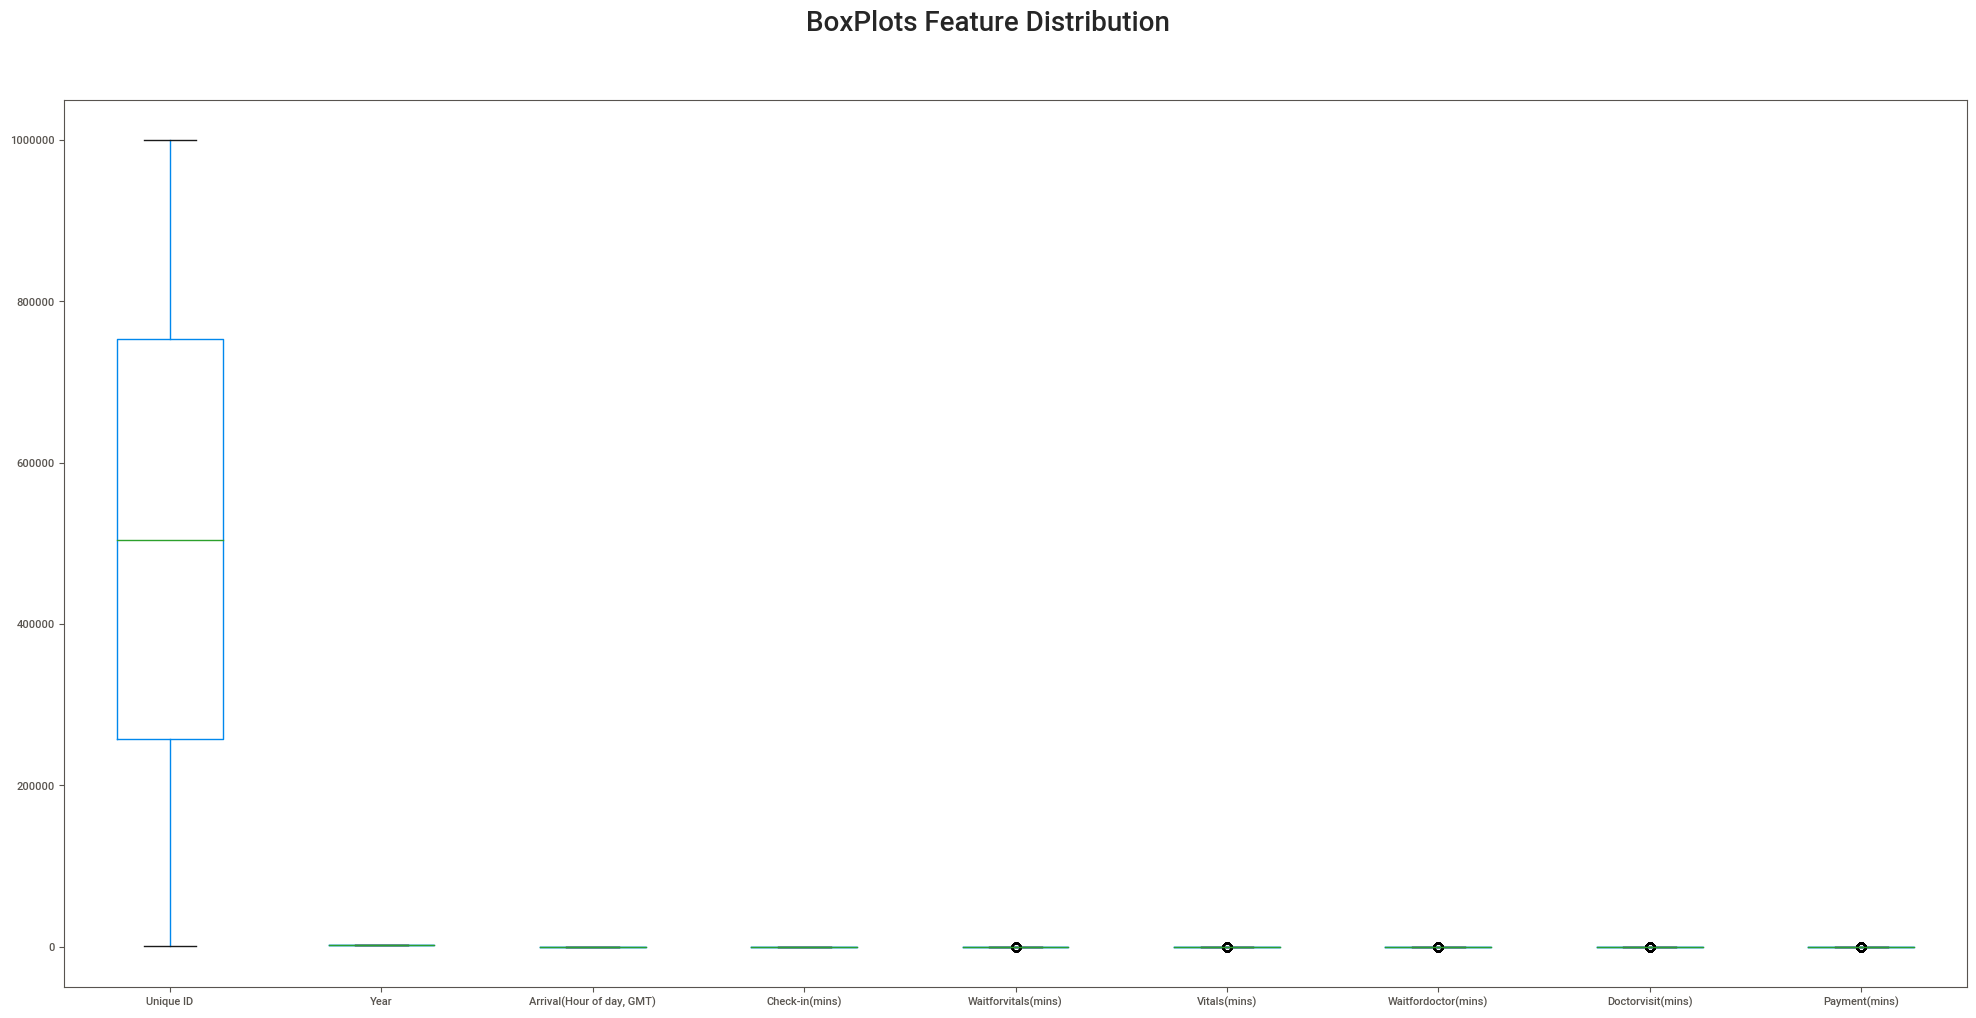

In [18]:
df.boxplot(figsize=(20,10), grid=False)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

## Data Preprocessing

### Feature Engineering

In [19]:
df.head()

,Unique ID,Year,"Arrival(Hour of day, GMT)",Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins),Diagnosisgroup,Admin(check-in),Nurse(vitals),Doctor
0,476,2019,11,1.00,12.00,3.00,13.00,8.10,2.00,Group 3,"Akapo, K","Kumar, S",Dr. Jankowski
1,902,2019,20,2.00,10.00,5.75,13.00,7.20,6.00,Group 3,"Akapo, K","Turner, P",Dr. Yung
2,1236,2019,9,3.00,24.70,4.60,23.40,6.00,2.00,Group 2,"Smith, J","Musk, J",Dr. Jankowski
3,1925,2019,11,2.00,14.00,5.75,18.00,3.60,2.00,Group 3,"Smith, J","Turner, P",Dr. Jankowski
4,1999,2019,13,3.00,16.50,4.20,22.00,7.20,6.00,Group 3,"Akapo, K","Lumantas, M",Dr. Jankowski


In [20]:
df["TotalWaitTimes"] = df["Waitforvitals(mins)"] + df["Vitals(mins)"]

In [21]:
df["TotalDoctorTimes"] = df["Waitfordoctor(mins)"] + df["Doctorvisit(mins)"]

In [22]:
df.head(1)

,Unique ID,Year,"Arrival(Hour of day, GMT)",Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins),Diagnosisgroup,Admin(check-in),Nurse(vitals),Doctor,TotalWaitTimes,TotalDoctorTimes
0,476,2019,11,1.00,12.00,3.00,13.00,8.10,2.00,Group 3,"Akapo, K","Kumar, S",Dr. Jankowski,15.00,21.10


### Treat Duplicate Values

In [23]:
df.duplicated(keep='first').sum()

23

In [24]:
df[df.duplicated(keep=False)] #Check duplicate values

,Unique ID,Year,"Arrival(Hour of day, GMT)",Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins),Diagnosisgroup,Admin(check-in),Nurse(vitals),Doctor,TotalWaitTimes,TotalDoctorTimes
182,36884,2019,19,1.00,12.50,5.50,43.75,6.00,5.00,Group 2,"Smith, J","Knight, F",Dr. Jankowski,18.00,49.75
183,36884,2019,19,1.00,12.50,5.50,43.75,6.00,5.00,Group 2,"Smith, J","Knight, F",Dr. Jankowski,18.00,49.75
402,81658,2019,13,5.00,14.30,4.00,23.10,10.00,3.00,Group 2,"Smith, J","Kumar, S",Dr. Jankowski,18.30,33.10
403,81658,2019,13,5.00,14.30,4.00,23.10,10.00,3.00,Group 2,"Smith, J","Kumar, S",Dr. Jankowski,18.30,33.10
432,87029,2019,16,1.00,15.30,5.00,17.00,5.40,3.00,Group 3,"Akapo, K","Kumar, S",Dr. Campos,20.30,22.40
433,87029,2019,16,1.00,15.30,5.00,17.00,5.40,3.00,Group 3,"Akapo, K","Kumar, S",Dr. Campos,20.30,22.40
1068,216097,2019,20,4.00,12.00,7.70,22.00,6.00,6.00,Group 2,"Smith, J","Knight, F",Dr. Yung,19.70,28.00
1069,216097,2019,20,4.00,12.00,7.70,22.00,6.00,6.00,Group 2,"Smith, J","Knight, F",Dr. Yung,19.70,28.00
1599,318105,2019,11,1.00,14.00,5.10,27.00,8.00,8.00,Group 2,"Smith, J","Birdsall, A",Dr. Yung,19.10,35.00
1600,318105,2019,11,1.00,14.00,5.10,27.00,8.00,8.00,Group 2,"Smith, J","Birdsall, A",Dr. Yung,19.10,35.00


In [25]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [26]:
df

,Unique ID,Year,"Arrival(Hour of day, GMT)",Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins),Diagnosisgroup,Admin(check-in),Nurse(vitals),Doctor,TotalWaitTimes,TotalDoctorTimes
0,476,2019,11,1.00,12.00,3.00,13.00,8.10,2.00,Group 3,"Akapo, K","Kumar, S",Dr. Jankowski,15.00,21.10
1,902,2019,20,2.00,10.00,5.75,13.00,7.20,6.00,Group 3,"Akapo, K","Turner, P",Dr. Yung,15.75,20.20
2,1236,2019,9,3.00,24.70,4.60,23.40,6.00,2.00,Group 2,"Smith, J","Musk, J",Dr. Jankowski,29.30,29.40
3,1925,2019,11,2.00,14.00,5.75,18.00,3.60,2.00,Group 3,"Smith, J","Turner, P",Dr. Jankowski,19.75,21.60
4,1999,2019,13,3.00,16.50,4.20,22.00,7.20,6.00,Group 3,"Akapo, K","Lumantas, M",Dr. Jankowski,20.70,29.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,998699,2019,10,5.00,27.50,3.80,16.50,6.00,1.00,Group 2,"Smith, J","Aros, W",Dr. Yung,31.30,22.50
4980,998705,2019,17,5.00,14.25,4.00,20.90,3.60,3.00,Group 3,"Akapo, K","Kumar, S",Dr. Campbell,18.25,24.50
4981,999064,2019,15,4.00,12.60,4.60,22.23,3.60,3.00,Group 3,"Smith, J","Turner, P",Dr. Balla,17.20,25.83
4982,999605,2019,20,2.30,17.00,3.45,20.00,3.60,6.90,Group 3,"Ramos, T","Musk, J",Dr. Jankowski,20.45,23.60


In [27]:
df.reset_index(drop=True, inplace=True)

### Remove columns

In [28]:
df.columns

Index(['Unique ID', 'Year', 'Arrival(Hour of day, GMT)', 'Check-in(mins)', 'Waitforvitals(mins)', 'Vitals(mins)', 'Waitfordoctor(mins)', 'Doctorvisit(mins)', 'Payment(mins)', 'Diagnosisgroup', 'Admin(check-in)', 'Nurse(vitals)', 'Doctor', 'TotalWaitTimes', 'TotalDoctorTimes'], dtype='object')

In [29]:
df.drop(['Unique ID', 'Year', 'Admin(check-in)', 'Nurse(vitals)'], axis=1, inplace=True)

In [30]:
df

,"Arrival(Hour of day, GMT)",Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins),Diagnosisgroup,Doctor,TotalWaitTimes,TotalDoctorTimes
0,11,1.00,12.00,3.00,13.00,8.10,2.00,Group 3,Dr. Jankowski,15.00,21.10
1,20,2.00,10.00,5.75,13.00,7.20,6.00,Group 3,Dr. Yung,15.75,20.20
2,9,3.00,24.70,4.60,23.40,6.00,2.00,Group 2,Dr. Jankowski,29.30,29.40
3,11,2.00,14.00,5.75,18.00,3.60,2.00,Group 3,Dr. Jankowski,19.75,21.60
4,13,3.00,16.50,4.20,22.00,7.20,6.00,Group 3,Dr. Jankowski,20.70,29.20
...,...,...,...,...,...,...,...,...,...,...,...
4979,10,5.00,27.50,3.80,16.50,6.00,1.00,Group 2,Dr. Yung,31.30,22.50
4980,17,5.00,14.25,4.00,20.90,3.60,3.00,Group 3,Dr. Campbell,18.25,24.50
4981,15,4.00,12.60,4.60,22.23,3.60,3.00,Group 3,Dr. Balla,17.20,25.83
4982,20,2.30,17.00,3.45,20.00,3.60,6.90,Group 3,Dr. Jankowski,20.45,23.60


### One-hot encoding

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4984 entries, 0 to 4983
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Arrival(Hour of day, GMT)  4984 non-null   int64  
 1   Check-in(mins)             4984 non-null   float64
 2   Waitforvitals(mins)        4984 non-null   float64
 3   Vitals(mins)               4984 non-null   float64
 4   Waitfordoctor(mins)        4984 non-null   float64
 5   Doctorvisit(mins)          4984 non-null   float64
 6   Payment(mins)              4984 non-null   float64
 7   Diagnosisgroup             4984 non-null   object 
 8   Doctor                     4984 non-null   object 
 9   TotalWaitTimes             4984 non-null   float64
 10  TotalDoctorTimes           4984 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 428.4+ KB


In [32]:
df2 = pd.get_dummies(data=df,drop_first=True)

In [33]:
df2

,"Arrival(Hour of day, GMT)",Check-in(mins),Waitforvitals(mins),Vitals(mins),Waitfordoctor(mins),Doctorvisit(mins),Payment(mins),TotalWaitTimes,TotalDoctorTimes,Diagnosisgroup_Group 2,Diagnosisgroup_Group 3,Doctor_Dr. Campbell,Doctor_Dr. Campos,Doctor_Dr. Jankowski,Doctor_Dr. Yung
0,11,1.00,12.00,3.00,13.00,8.10,2.00,15.00,21.10,0,1,0,0,1,0
1,20,2.00,10.00,5.75,13.00,7.20,6.00,15.75,20.20,0,1,0,0,0,1
2,9,3.00,24.70,4.60,23.40,6.00,2.00,29.30,29.40,1,0,0,0,1,0
3,11,2.00,14.00,5.75,18.00,3.60,2.00,19.75,21.60,0,1,0,0,1,0
4,13,3.00,16.50,4.20,22.00,7.20,6.00,20.70,29.20,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,10,5.00,27.50,3.80,16.50,6.00,1.00,31.30,22.50,1,0,0,0,0,1
4980,17,5.00,14.25,4.00,20.90,3.60,3.00,18.25,24.50,0,1,1,0,0,0
4981,15,4.00,12.60,4.60,22.23,3.60,3.00,17.20,25.83,0,1,0,0,0,0
4982,20,2.30,17.00,3.45,20.00,3.60,6.90,20.45,23.60,0,1,0,0,1,0


### Save to CSV

In [34]:
df.to_csv("healthrevised.csv", index=False)

## Regression Analysis

### Linear Regression (StatsModel)

In [ ]:
df.columns

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(x)

In [ ]:
linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(prestige_model, "education")
fig.tight_layout(pad=1.0)

### Linear Regression (SKLearn)

## Logistic Regression (StatsModel)

In [ ]:
df.columns

In [ ]:
y = df['']
X = df['']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.Logit(y, X).fit()

In [ ]:
model.summary()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ Debt_Service_Coverage + cash_security_to_curLiab + TNW', data = hgc).fit()

In [ ]:
logitfit = smf.logit(formula = 'DF ~ TNW + C(seg2)', data = hgcdev).fit()

### Logistic Regression (SKLearn)

In [ ]:
df.shape

In [ ]:
X = df.iloc[:,:4]
y = df.iloc[:,4]

In [ ]:
Counter(y)

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
Counter(y_train), Counter(y_test)

In [ ]:
lr = LogisticRegression(random_state=0)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
plot_confusion_matrix(estimator=lr, X=X_test, y_true=y_test, cmap='YlGnBu')
plt.show()

In [ ]:
plot_roc_curve(estimator=lr, X=X_test, y=y_test)
plt.show()

#### Python code done by Dennis Lam